## Examine General Metric (depth, nvisits, etc.) Results in DDFs
**Author(s):** Weixiang Yu & Gordon Richards
<br>**Last updated:** 04-07-21
<br>**Short description:**
This notebook shows the results of a few general metric (single epoch depth, max airmass and nvisits) evaluated in the DDFs, as to help understand the DCR results given the complexity/diversity of DDFs.

### 0. Software Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import glob
import os, sys

mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/configs/master/viz/yuBasic.rc')
%matplotlib inline

In [2]:
# automatically extract username
your_username = os.getcwd().split('/')[5]
print(f'Your automatically extracted username is: {your_username}.'
        '\nIf it is incorrect, please mannually reset it.')

Your automatically extracted username is: ywx649999311.
If it is incorrect, please mannually reset it.


##### Import the sims_maf modules needed.

In [3]:
# import lsst.sim.maf moduels modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
from lsst.sims.maf.stackers import BaseStacker
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

# add path
sys.path.insert(0, '../src/')
sys.path.insert(0, '../data/run_info//')

# import convenience functions
from opsimUtils import *

### 1. Read data from disk

In [6]:
 # do NOT put your username here, put it in the cell at the top of the notebook.
if your_username == '':
    raise Exception('Please provide your username!  See the top of the notebook.')

resultDbPath = f'/home/idies/workspace/Temporary/{your_username}/LSST_MAF/'+\
                'wy/Genernal/AllDDF_n128_v1_040621/ResultDBs/'
metricDataPath = f'/home/idies/workspace/Temporary/{your_username}/LSST_MAF/'+\
                'wy/Genernal/AllDDF_n128_v1_040621/MetricData/'

In [7]:
# import metric evaluations
bundleDicts = {}

resultDbsView = getResultsDbs(resultDbPath)
for runName in resultDbsView:
    bundleDicts[runName] = bundleDictFromDisk(resultDbsView[runName], runName, metricDataPath)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slic

In [8]:
# check keys
dbRuns = list(resultDbsView.keys())
bd_keys = list(bundleDicts[dbRuns[0]].keys())
print(bd_keys)

[(1, 'm5Meidan_u_COSMOS'), (2, 'm5RMS_u_COSMOS'), (3, 'airmassMax_u_COSMOS'), (4, 'nvisit_u_COSMOS'), (5, 'm5Meidan_u_ECDFS'), (6, 'm5RMS_u_ECDFS'), (7, 'airmassMax_u_ECDFS'), (8, 'nvisit_u_ECDFS'), (9, 'm5Meidan_g_ELAISS1'), (10, 'm5RMS_g_ELAISS1'), (11, 'airmassMax_g_ELAISS1'), (12, 'nvisit_g_ELAISS1'), (13, 'm5Meidan_g_XMM-LSS'), (14, 'm5RMS_g_XMM-LSS'), (15, 'airmassMax_g_XMM-LSS'), (16, 'nvisit_g_XMM-LSS'), (17, 'm5Meidan_u_XMM-LSS'), (18, 'm5RMS_u_XMM-LSS'), (19, 'airmassMax_u_XMM-LSS'), (20, 'nvisit_u_XMM-LSS'), (21, 'm5Meidan_u_EDFS'), (22, 'm5RMS_u_EDFS'), (23, 'airmassMax_u_EDFS'), (24, 'nvisit_u_EDFS'), (25, 'm5Meidan_r_ELAISS1'), (26, 'm5RMS_r_ELAISS1'), (27, 'airmassMax_r_ELAISS1'), (28, 'nvisit_r_ELAISS1'), (29, 'm5Meidan_g_COSMOS'), (30, 'm5RMS_g_COSMOS'), (31, 'airmassMax_g_COSMOS'), (32, 'nvisit_g_COSMOS'), (33, 'm5Meidan_r_ECDFS'), (34, 'm5RMS_r_ECDFS'), (35, 'airmassMax_r_ECDFS'), (36, 'nvisit_r_ECDFS'), (37, 'm5Meidan_r_COSMOS'), (38, 'm5RMS_r_COSMOS'), (39, 'airmas

#### Keep only result for the relevant OpSims

In [9]:
# read in the list of relevant runs
with open('../data/run_info/runs_list.txt', 'r') as runs_file:
    runs_list = runs_file.read().split('\n')
runs_list[:5]

['agnddf_v1.5_10yrs',
 'alt_dust_v1.5_10yrs',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs',
 'barebones_nexp2_v1.6_10yrs',
 'barebones_v1.6_10yrs']

In [10]:
# select metric results for the relevant opsims
final_bundleDicts = {key:value for (key, value) in bundleDicts.items() if key in runs_list}
final_resultDbs = {key:value for (key, value) in resultDbsView.items() if key in runs_list}

### 2. Make plots (best 10, worst 10 and all other ddfs)
- m5Median
- airmassMax
- nvisit

In [11]:
# take Lynne's notes on families
sys.path.insert(0, '../data/run_info/')
import run_infos as ri

# gather family info, but remove version_baselines
families = ri.FamilyInfo()
fam_db = {key:value for (key, value) in families.family.items() if key != 'version_baselines'}
family_ls = list(fam_db.keys())
comp_runs = {key:value for (key, value) in families.family_baseline.items() if key != 'version_baselines'}

In [17]:
from radar_plot import *
from matplotlib.colors import ListedColormap

In [18]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)

    return ListedColormap(color_list, name=cmap_name)

In [76]:
def radar(df, rgrids=[0.7, 1.0, 1.3, 1.6], cmap=None,
          alpha=0.1, legend=True, figsize=(8.5, 5), fill=False,
          bbox_to_anchor=(1.6, 0.5)):
    """
    make a radar plot!
    """
    theta = radar_factory(np.size(df.columns), frame='polygon')
    fig, axes = plt.subplots(figsize=figsize, subplot_kw=dict(projection='radar'))
    axes.set_rgrids(rgrids)

    ix = 0
    my_cmap = discrete_cmap(len(df), cmap)
    for i, row in df.iterrows():
        axes.plot(theta, row.values, 'o-', label=i, color=my_cmap(ix), markersize=4)
        if fill:
            axes.fill(theta, row.values, alpha=alpha)
        ix += 1

    variables = df.columns.values

    axes.set_varlabels(variables)
    if legend:
        axes.legend(bbox_to_anchor=bbox_to_anchor, borderaxespad=0, 
                    loc='lower right', fontsize=10)
    axes.set_ylim([np.min(rgrids), np.max(rgrids)])

    return fig, axes

#### 2.1 m5Median
__!!__ All metric values will be normalized to the result of the `XMM-LSS` field from comparision

In [84]:
# print all metric names
KeyNames = [key[1] for key in bd_keys if 'm5Meidan' in key[1] and '_r_' not in key[1]]
KeyNames

['m5Meidan_u_COSMOS',
 'm5Meidan_u_ECDFS',
 'm5Meidan_g_ELAISS1',
 'm5Meidan_g_XMM-LSS',
 'm5Meidan_u_XMM-LSS',
 'm5Meidan_u_EDFS',
 'm5Meidan_g_COSMOS',
 'm5Meidan_g_ECDFS',
 'm5Meidan_u_ELAISS1',
 'm5Meidan_g_EDFS']

In [85]:
# get summary names
summaryNames = getSummaryStatNames(final_resultDbs['baseline_v1.5_10yrs'], 
                                   KeyNames[0])[0]['StatNames']

# loop through metric Keys and summaries -> combine into one pandas df
summary_dfs = []
for KeyName in KeyNames:
    for summaryName in ['Median']:
        summary_df = getSummary(
            final_resultDbs, 
            KeyName, 
            summaryName)[['summaryValue', 'runName']].rename(columns={'summaryValue':
                                                            f'{KeyName}_{summaryName}'})
        summary_dfs.append(summary_df.set_index('runName'))

summary_df_all = summary_dfs[0].join(summary_dfs[1:], 
                                     how='outer').reset_index().rename(columns={'index': 'runName'})
summary_df_all = summary_df_all.set_index('runName')

In [86]:
# define normalizing run
norm_run = 'baseline_v1.5_10yrs'
norm_metric_u_m5Median = summary_df_all.loc[norm_run, 'm5Meidan_u_XMM-LSS_Median']
norm_metric_g_m5Median = summary_df_all.loc[norm_run, 'm5Meidan_g_XMM-LSS_Median']

u_cols = [col for col in summary_df_all.columns if '_u_' in col]
g_cols = [col for col in summary_df_all.columns if '_g_' in col]

summary_df_normed = summary_df_all.copy()
summary_df_normed.loc[:, u_cols] = summary_df_normed.loc[:, u_cols] - norm_metric_u_m5Median
summary_df_normed.loc[:, g_cols] = summary_df_normed.loc[:, g_cols] - norm_metric_g_m5Median

# fillna
summary_df_normed = summary_df_normed.fillna(0)

# compute sum
summary_df_normed.loc[:, 'u_sum'] = summary_df_normed.loc[:, u_cols].sum(axis=1)
summary_df_normed.loc[:, 'g_sum'] = summary_df_normed.loc[:, g_cols].sum(axis=1)

# get dedicated ddf runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

#### 2.1.1 `u` band

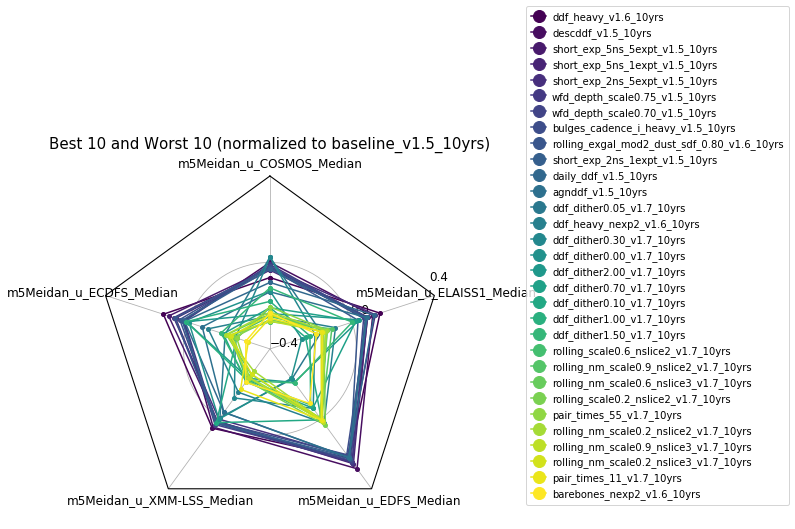

In [87]:
summary_df_normed_u = summary_df_normed.sort_values(
    'u_sum', ascending=False).loc[:, u_cols + ['u_sum']]
best_worst_u = pd.concat([summary_df_normed_u.iloc[:10], summary_df_normed_u.iloc[-10:]])
u_ddf_runs = np.unique(list(best_worst_u.index) + ddf_runs)

radar(summary_df_normed_u.loc[u_ddf_runs, :].sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(2, 0.05), figsize=(15, 7), rgrids=[-.4, 0, 0.4], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()

#### 2.1.2 `g` band

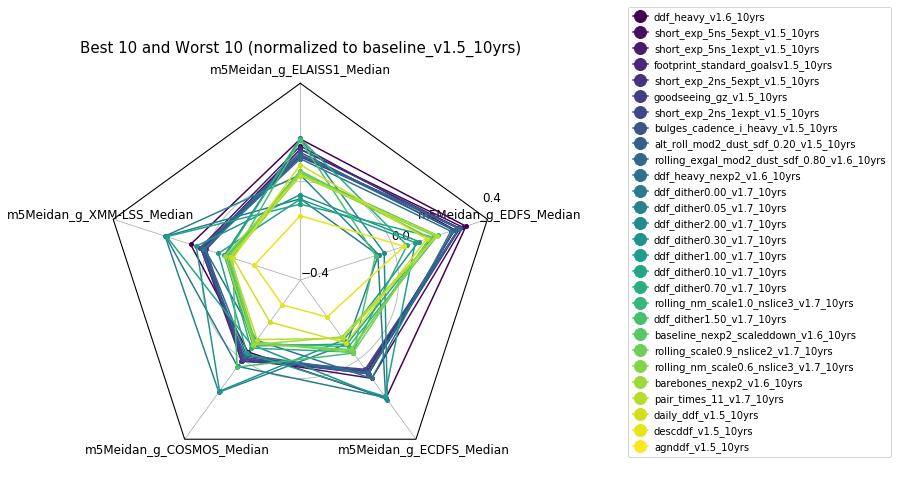

In [88]:
summary_df_normed_g = summary_df_normed.sort_values(
    'g_sum', ascending=False).loc[:, g_cols + ['g_sum']]
best_worst_g = pd.concat([summary_df_normed_g.iloc[:10], summary_df_normed_g.iloc[-10:]])
g_ddf_runs = np.unique(list(best_worst_g.index) + ddf_runs)

radar(summary_df_normed_g.loc[g_ddf_runs, :].sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(2, 0.05), figsize=(15, 7), rgrids=[-.4, 0, 0.4], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()

#### 2.2 airmassMax (Maximum airmass)
__!!__ All metric values will be normalized to the result of the `XMM-LSS` field from comparision

In [90]:
# print all metric names
KeyNames = [key[1] for key in bd_keys if 'airmassMax' in key[1] and '_r_' not in key[1]]
KeyNames

['airmassMax_u_COSMOS',
 'airmassMax_u_ECDFS',
 'airmassMax_g_ELAISS1',
 'airmassMax_g_XMM-LSS',
 'airmassMax_u_XMM-LSS',
 'airmassMax_u_EDFS',
 'airmassMax_g_COSMOS',
 'airmassMax_g_ECDFS',
 'airmassMax_u_ELAISS1',
 'airmassMax_g_EDFS']

In [91]:
# get summary names
summaryNames = getSummaryStatNames(final_resultDbs['baseline_v1.5_10yrs'], 
                                   KeyNames[0])[0]['StatNames']

# loop through metric Keys and summaries -> combine into one pandas df
summary_dfs = []
for KeyName in KeyNames:
    for summaryName in ['Median']:
        summary_df = getSummary(
            final_resultDbs, 
            KeyName, 
            summaryName)[['summaryValue', 'runName']].rename(columns={'summaryValue':
                                                            f'{KeyName}_{summaryName}'})
        summary_dfs.append(summary_df.set_index('runName'))

summary_df_all = summary_dfs[0].join(summary_dfs[1:], 
                                     how='outer').reset_index().rename(columns={'index': 'runName'})
summary_df_all = summary_df_all.set_index('runName')

In [92]:
# define normalizing run
norm_run = 'baseline_v1.5_10yrs'
norm_metric_u_m5Median = summary_df_all.loc[norm_run, 'airmassMax_u_XMM-LSS_Median']
norm_metric_g_m5Median = summary_df_all.loc[norm_run, 'airmassMax_g_XMM-LSS_Median']

u_cols = [col for col in summary_df_all.columns if '_u_' in col]
g_cols = [col for col in summary_df_all.columns if '_g_' in col]

summary_df_normed = summary_df_all.copy()
summary_df_normed.loc[:, u_cols] = summary_df_normed.loc[:, u_cols] - norm_metric_u_m5Median
summary_df_normed.loc[:, g_cols] = summary_df_normed.loc[:, g_cols] - norm_metric_g_m5Median

# fillna
summary_df_normed = summary_df_normed.fillna(0)

# compute sum
summary_df_normed.loc[:, 'u_sum'] = summary_df_normed.loc[:, u_cols].sum(axis=1)
summary_df_normed.loc[:, 'g_sum'] = summary_df_normed.loc[:, g_cols].sum(axis=1)

# get dedicated ddf runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

#### 2.2.1 `u` band

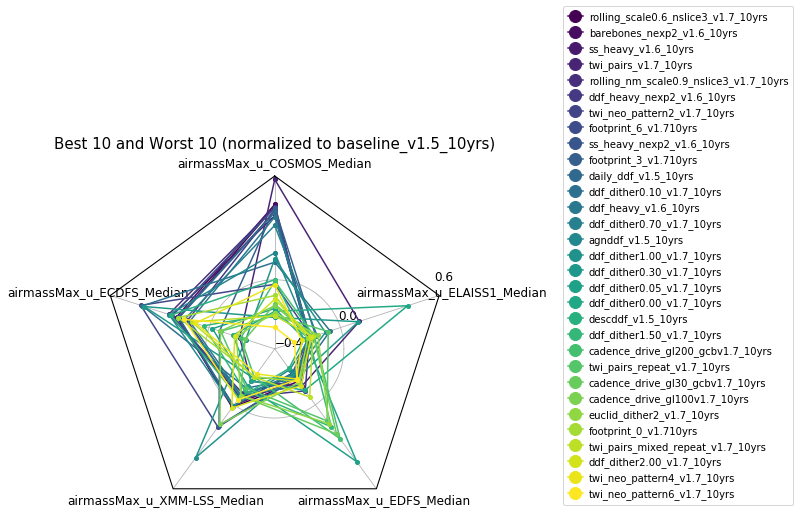

In [95]:
summary_df_normed_u = summary_df_normed.sort_values(
    'u_sum', ascending=False).loc[:, u_cols + ['u_sum']]
best_worst_u = pd.concat([summary_df_normed_u.iloc[:10], summary_df_normed_u.iloc[-10:]])
u_ddf_runs = np.unique(list(best_worst_u.index) + ddf_runs)

radar(summary_df_normed_u.loc[u_ddf_runs, :].sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(2, 0.05), figsize=(15, 7), rgrids=[-.4, 0, 0.6], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()

#### 2.2.2 `g` band

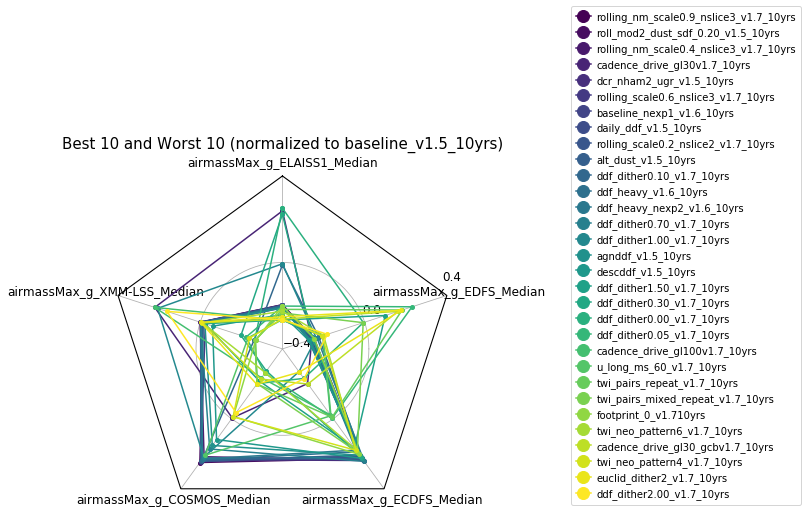

In [98]:
summary_df_normed_g = summary_df_normed.sort_values(
    'g_sum', ascending=False).loc[:, g_cols + ['g_sum']]
best_worst_g = pd.concat([summary_df_normed_g.iloc[:10], summary_df_normed_g.iloc[-10:]])
g_ddf_runs = np.unique(list(best_worst_g.index) + ddf_runs)

radar(summary_df_normed_g.loc[g_ddf_runs, :].sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(2, 0.05), figsize=(15, 7), rgrids=[-.4, 0, 0.4], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()

#### 2.3 nvisits
__!!__ All metric values will be normalized to the result of the `XMM-LSS` field from comparision

In [100]:
# print all metric names
KeyNames = [key[1] for key in bd_keys if 'nvisit' in key[1] and '_r_' not in key[1]]
KeyNames

['nvisit_u_COSMOS',
 'nvisit_u_ECDFS',
 'nvisit_g_ELAISS1',
 'nvisit_g_XMM-LSS',
 'nvisit_u_XMM-LSS',
 'nvisit_u_EDFS',
 'nvisit_g_COSMOS',
 'nvisit_g_ECDFS',
 'nvisit_u_ELAISS1',
 'nvisit_g_EDFS']

In [101]:
# get summary names
summaryNames = getSummaryStatNames(final_resultDbs['baseline_v1.5_10yrs'], 
                                   KeyNames[0])[0]['StatNames']

# loop through metric Keys and summaries -> combine into one pandas df
summary_dfs = []
for KeyName in KeyNames:
    for summaryName in ['Median']:
        summary_df = getSummary(
            final_resultDbs, 
            KeyName, 
            summaryName)[['summaryValue', 'runName']].rename(columns={'summaryValue':
                                                            f'{KeyName}_{summaryName}'})
        summary_dfs.append(summary_df.set_index('runName'))

summary_df_all = summary_dfs[0].join(summary_dfs[1:], 
                                     how='outer').reset_index().rename(columns={'index': 'runName'})
summary_df_all = summary_df_all.set_index('runName')

In [103]:
# define normalizing run
norm_run = 'baseline_v1.5_10yrs'
norm_metric_u_nvisit = summary_df_all.loc[norm_run, 'nvisit_u_XMM-LSS_Median']
norm_metric_g_nvisit = summary_df_all.loc[norm_run, 'nvisit_g_XMM-LSS_Median']

u_cols = [col for col in summary_df_all.columns if '_u_' in col]
g_cols = [col for col in summary_df_all.columns if '_g_' in col]

summary_df_normed = summary_df_all.copy()
summary_df_normed.loc[:, u_cols] = (summary_df_normed.loc[:, u_cols]/norm_metric_u_nvisit)
summary_df_normed.loc[:, g_cols] = summary_df_normed.loc[:, g_cols]/norm_metric_g_nvisit

# fillna
summary_df_normed = summary_df_normed.fillna(0)

# compute sum
summary_df_normed.loc[:, 'u_sum'] = summary_df_normed.loc[:, u_cols].sum(axis=1)
summary_df_normed.loc[:, 'g_sum'] = summary_df_normed.loc[:, g_cols].sum(axis=1)

# get dedicated ddf runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

#### 2.3.1 `u` band

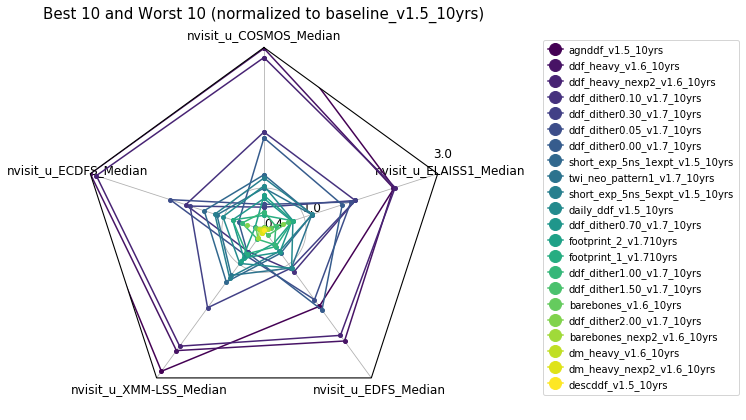

In [113]:
summary_df_normed_u = summary_df_normed.sort_values(
    'u_sum', ascending=False).loc[:, u_cols + ['u_sum']]
best_worst_u = pd.concat([summary_df_normed_u.iloc[:10], summary_df_normed_u.iloc[-10:]])
u_ddf_runs = np.unique(list(best_worst_u.index) + ddf_runs)

radar(summary_df_normed_u.loc[u_ddf_runs, :].sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(1.8, 0.05), figsize=(14, 6), rgrids=[.4, 1, 3], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()

##### __Zoom in__

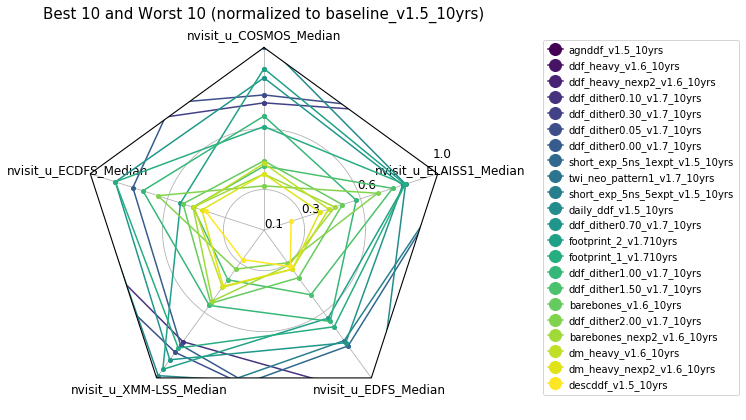

In [114]:
summary_df_normed_u = summary_df_normed.sort_values(
    'u_sum', ascending=False).loc[:, u_cols + ['u_sum']]
best_worst_u = pd.concat([summary_df_normed_u.iloc[:10], summary_df_normed_u.iloc[-10:]])
u_ddf_runs = np.unique(list(best_worst_u.index) + ddf_runs)

radar(summary_df_normed_u.loc[u_ddf_runs, :].sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(1.8, 0.05), figsize=(14, 6), rgrids=[.1, .3, .6, 1,], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()

#### 2.3.2 `g` band

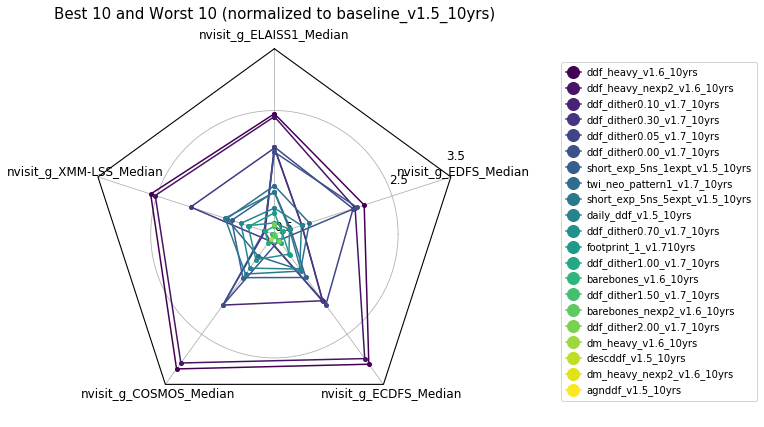

In [119]:
summary_df_normed_g = summary_df_normed.sort_values(
    'g_sum', ascending=False).loc[:, g_cols + ['g_sum']]
best_worst_g = pd.concat([summary_df_normed_g.iloc[:10], summary_df_normed_g.iloc[-10:]])
g_ddf_runs = np.unique(list(best_worst_g.index) + ddf_runs)

radar(summary_df_normed_g.loc[g_ddf_runs, :].sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(1.8, 0.05), figsize=(14, 6), rgrids=[0.5, 2.5, 3.5], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()

##### __Zoom in__

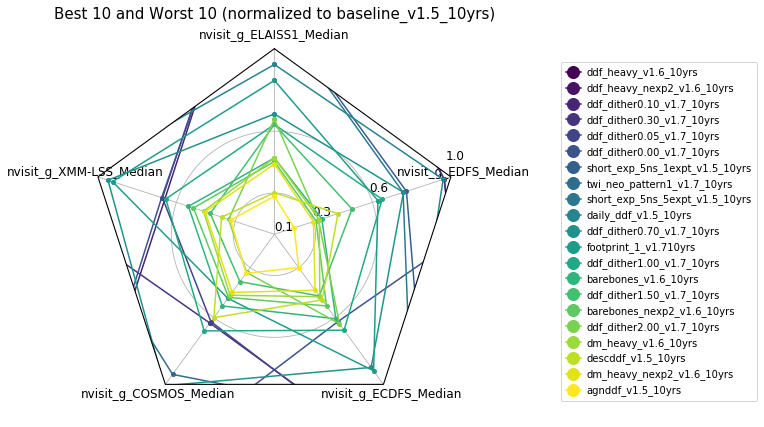

In [120]:
summary_df_normed_g = summary_df_normed.sort_values(
    'g_sum', ascending=False).loc[:, g_cols + ['g_sum']]
best_worst_g = pd.concat([summary_df_normed_g.iloc[:10], summary_df_normed_g.iloc[-10:]])
g_ddf_runs = np.unique(list(best_worst_g.index) + ddf_runs)

radar(summary_df_normed_g.loc[g_ddf_runs, :].sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(1.8, 0.05), figsize=(14, 6), rgrids=[0.1, .3, .6, 1], cmap='viridis', alpha=0.8)
_ = plt.title('Best 10 and Worst 10 (normalized to baseline_v1.5_10yrs)', fontsize=15)
plt.tight_layout()